In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
#%matplotlib inline

In [9]:
T_0 = 8000 #fs - inital pulse width
distance_pas = 30/T_0**2*4500 #fiber lenght
distance_act = 2/T_0**2*76900
P_0 = 0.033 # W initial pilse peakpower
Beta2 =-1#input(’dispersion: 1 for normal, -1 for anomalous’);%
Beta3_act = 168/76.9/T_0# don't know which value should I put
Beta3 = 109/4.5/T_0
N = 1 #(’Nonlinear parameter N = ’); % soliton order
mshape =1#(’m = 0 for sech, m > 0 for super-Gaussian = ’);
chirp0 = 0#; % input pulse chirp (default value)
Nt = 2*8*1024#16384*64#something strange
Tmax = 32#2*16384#128
Step_num_pas = int(np.round(distance_pas/distance_act))*1000#1000#int(np.round(2000*distance_pas*N**2))# No. of z steps to
Step_num_act = 1000#1000#int(np.round(2000*distance_act*N**2))
Deltaz_pas = distance_pas/Step_num_pas# step size in z
Deltaz_act = distance_act/Step_num_act
Dtau = (2*Tmax)/Nt# step size in tau
Alpha_act = 0.02*np.log(10)*T_0**2/76900000 #fiber losses
Alpha = 0.02*np.log(10)*T_0**2/4500000
Q0 = 0.12#0.1 #modulation depth
P_sat = 3.69#saturation power
Rout = 0.9# coupler coeffcient
Psat_g = 0.02
G0 = 0.515*np.log(10)*T_0**2/76900 #gain
Omega0 = 1000
OmegaG = 10000
Tr = (32)*1.5/3*10**7
gamma = 0.00212*P_0*T_0**2/4500
Energy = []
gamma_act = 0.00932*P_0*T_0**2/76900
#pulse width is about fs
print('gamma_act',gamma_act,'gamma',gamma,'G0',G0, 'Tr', Tr)

def savepic(i,uu):
    plt.clf()
    plt.plot(Tau, np.abs(uu)**2)
    plt.xlabel('Normalized Time')
    plt.ylabel('Normalized Power')
    plt.title('Output and Input Pulse Shape of second core')
    pic_name = 'C:/Users/ilyag/Pictures/sample/las_pic/{0}.png'.format(i)
    plt.savefig(pic_name)
    
def spectrumsavepic(i,uu):
    plt.clf()
    ww = np.fft.fftshift(np.fft.ifft(uu))*(Nt*Dtau)/np.sqrt(2*np.pi)
    f , (x1,x2) = plt.subplots(1,2)
    x1.plot(Tau,np.abs(uu)**2)
    x1.axis([-5,5,0,10])
    x2.plot(np.fft.fftshift(Omega),np.abs(ww))
    #x2.axis([-5,5,0,2])
    x2.set_title('Spectrum')
    x1.set_title('Shape')
    pic_name = 'C:/Users/ilyag/Pictures/sample/spec_folder/{0}.png'.format(i)
    f.savefig(pic_name)
    f.clf()
    plt.close(f)
    f = 0
    
def gif_create(name):
    images = []
    path = 'C:/Users/ilyag/Pictures/sample/las_pic'
    filenames = os.listdir(path)
    with imageio.get_writer('C:/Users/ilyag/Pictures/sample/las_gif_only/'+name+'.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(path+'/'+filename)
            writer.append_data(image)

def plot_pulse_time(uu,input_u,tau,name):
    plt.plot(tau, np.abs(uu)**2)
    plt.plot(tau,np.abs(input_u)**2)
    plt.axis([-5,5,0,1])
    plt.xlabel('Normalized Time')
    plt.ylabel('Normalized Power')
    plt.title('Output and Input Pulse Shape')
    plt.legend(['output','input'])
    #plt.savefig(name)

def absorber(uu):
    return np.array([u*(1-(Q0/(1+P_0*np.abs(u)**2/P_sat))) for u in uu])    

def spliter(uu): #first returns field that left cavity, second - field which remain in cavity 
    return np.array([uu*Rout,uu*(1-Rout)])    

Tau = np.linspace(-Nt/2,Nt/2-1, Nt)*Dtau# temporal grid
Omega = (np.pi/Tmax)*np.array([np.linspace(0,Nt/2-1,Nt/2), np.linspace(-Nt/2,-1,Nt/2)])# frequency grid
Omega = np.reshape(Omega,(np.product(Omega.shape),))
#Omega = np.fft.fftshift(Omega) ##Must be carefull with this crazy stuff
def g(E):
    return 1/(1+E/(Psat_g*Tr))*G0*Deltaz_act

def Mshape(mshape):
    if mshape == 0:
        uu = np.cosh(Tau)**(-1)*np.exp(-0.5j*chirp0*Tau**2) # soliton
    else: #% super-Gaussian
        uu = np.exp(-0.5*(1+1j*chirp0)*Tau**(2*mshape))
    return uu

Dispersion_pas = np.exp(0.5j*Beta2*Omega**2*Deltaz_pas - np.abs(Omega**3)*Beta3/6*Deltaz_pas)
Dispersion_act = np.exp(0.5j*Beta2*Omega**2*Deltaz_act - np.abs(Omega**3)*Beta3_act/6*Deltaz_act)# % phase factor
Hhz_pas = 1j*N**2*gamma# nonlinear phase factor
Hhz_act = 1j*N**2*gamma_act

def plot_energy():
        plt.plot(Energy)
        plt.xlabel('step_num')
        plt.ylabel('Energy')
        plt.show()

gamma_act 0.2559667100130039 gamma 0.9949866666666668 G0 986.907732966 Tr 160000000.0


In [3]:
""" if mshape == 0:
    uu = np.cosh(Tau)**(-1)*np.exp(-0.5j*chirp0*Tau**2) # soliton
else: #% super-Gaussian
    uu = np.exp(-0.5*(1+1j*chirp0)*Tau**(2*mshape))
    """
uu = Mshape(mshape)

Passive fiber

In [4]:
def passive_fiber(uu): #return first shape, then spectrum
    temp = uu*np.exp(np.abs(uu)**2*Hhz_pas*Deltaz_pas/2 -Alpha*Deltaz_pas/2)
    for i in range(Step_num_pas):
        f_temp = np.fft.ifft(temp)*Dispersion_pas
        uu = np.fft.fft(f_temp)
        temp = uu*np.exp(np.abs(uu)**2*Hhz_pas*Deltaz_pas -Alpha*Deltaz_pas) #-1j*alpha*deltaz*cu)
    return temp*np.exp(np.abs(uu)**2*Hhz_pas*Deltaz_pas/2 -Alpha*Deltaz_pas/2)#, np.fft.fftshift(np.fft.ifft(uu))*(Nt*Dtau)/np.sqrt(2*np.pi)

Active fiber

In [5]:
def active_fiber(uu):
    E = 2*Tmax*P_0*np.mean(np.abs(uu)**2)*T_0
    Energy.append(E)
    temp = uu*np.exp(np.abs(uu)**2*Hhz_act*Deltaz_act/2 -Alpha_act*Deltaz_act/2)
    #print(E)
    for i in range(Step_num_act):
        f_temp = np.fft.ifft(temp)*Dispersion_act*np.exp(g(E))
        #print(i,f_temp)
        uu = np.fft.fft(f_temp)
        #print(i,uu)
        temp = uu*np.exp(np.abs(uu)**2*Hhz_act*Deltaz_act -Alpha_act*Deltaz_act) #-1j*alpha*deltaz*cu)
        E = 2*Tmax*P_0*np.mean(np.abs(uu)**2)*T_0
    return temp*np.exp(np.abs(uu)**2*Hhz_act/2*Deltaz_act -Alpha_act*Deltaz_act/2)#, np.fft.fftshift(np.fft.ifft(uu))*(Nt*Dtau)/np.sqrt(2*np.pi)

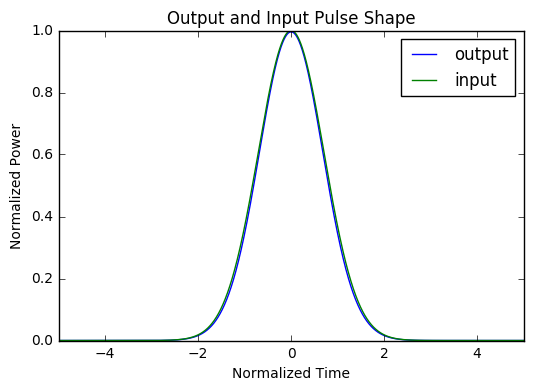

In [10]:
vv = active_fiber(passive_fiber(uu))#[0])
k = absorber(vv)#[0])
c = spliter(k)
plot_pulse_time(c[1],uu,Tau,'1')
#plt.plot(Tau,c[1])
plt.show()

In [7]:
def full_loop(uu):
    vv = active_fiber(uu)
    vv = passive_fiber(vv)#[0])
    vv = absorber(vv)#[0])
    vv = spliter(vv)[1]
    return vv
    

In [11]:
uu = Mshape(mshape)
vv = full_loop(uu)
for _ in range(500):
    if _%20 == 0:
        #savepic(_,vv)
        spectrumsavepic(_,vv)
    vv = full_loop(vv)
print (len(vv),len(uu),len(Tau))
#plot_pulse_time(vv,uu,Tau,'1')

16384 16384 16384


In [11]:
vv = passive_fiber(uu)
for _ in range(3000):
    if _%50 == 0:
        savepic(_,vv[0])
        spectrumsavepic(_,vv[0])
    vv = active_fiber(vv[0])
    vv = passive_fiber(vv[0])    
    

ValueError: x and y must have same first dimension

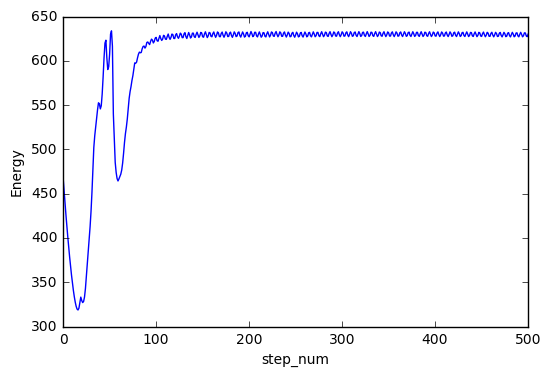

In [34]:
plot_energy()
plt.savefig('energy')

In [74]:
Energy = []

[-0.4, 0.4, 0, 1]

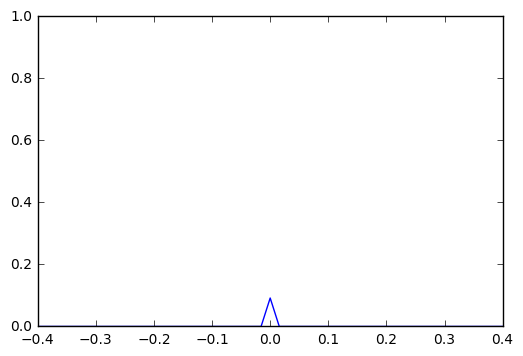

In [10]:
plt.plot(Tau,np.abs(vv)**2/2000)
plt.axis([-0.4,0.4,0,1])

In [212]:
def test(Nt,Tmax):
    Dtau = 2*Tmax/Nt
    Tau = np.linspace(-Nt/2,Nt/2-1, Nt)*Dtau# temporal grid
    omega = (np.pi/Tmax)*np.array([np.linspace(0,Nt/2-1,Nt/2), np.linspace(-Nt/2,-1,Nt/2)])# frequency grid
    omega = np.reshape(omega,(np.product(omega.shape),))
    uu = np.exp(-0.5*(1+1j*chirp0)*Tau**(2))
    freq = np.fft.fftfreq(uu.shape[0])
    k = active_fiber(uu)[0]
    for _ in range(500):
        k = active_fiber(k)[0]
    ww = np.fft.fftshift(np.fft.ifft(k))*(Nt*Dtau)/np.sqrt(2*np.pi)
    f , (x1,x2) = plt.subplots(1,2)
    x1.plot(Tau,np.abs(k)**2)
    x2.scatter(np.fft.fftshift(omega),np.abs(ww))
    x2.axis([-10,10,0,1])
    #x2.scatter(np.fft.ifft(np.abs(uu)**2))*(Nt*Dtau)/np.sqrt(2*np.pi)

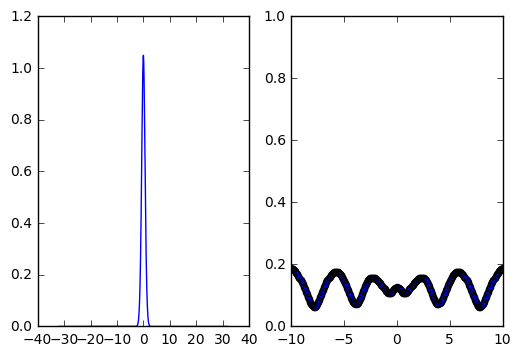

In [187]:
test(8192,32)

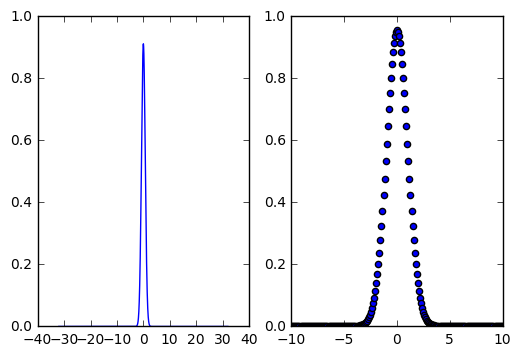

In [214]:
test(4096,32)

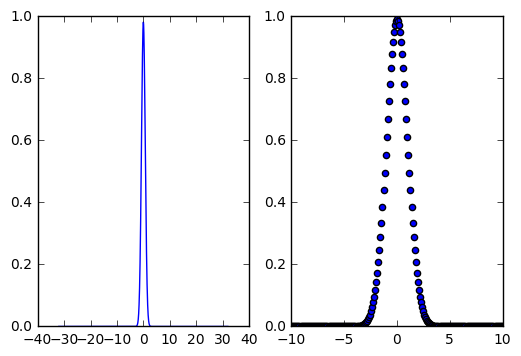

In [211]:
test(2048,32)

In [ ]:
vv = passive_fiber(uu)
for _ in range(3000):
    vv = passive_fiber(vv[0])
plot_pulse_time(vv[0],uu,Tau,'1')